## Laboratory Session 07
### Sabrina Giorgetti
### Matricola: 2013375
### Email: sabrina.giorgetti@studenti.unipd.it

In [2]:
# for full width
#IRdisplay::display_html('<style>.container { width:75% !important; }</style>')

library(tidyverse)
library(gridExtra)
library(EnvStats)
library(latex2exp)
library(ggpubr)
library(devtools)
library(geometry)
library(R.utils)
library(bayestestR)
library(cbinom)
library(EbayesThresh)
require(graphics)
library(evir)
library(DistributionUtils)
#options(repr.plot.width = 10, repr.plot.height = 6) 
#par(mfrow=c(1, 2))

## Exercise 1

A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease. A young UniPD startUp has developed an innovative method of screening.  During the qualification phase, a random sample of n= 75 patients known to have the disease is screened using the new method.

 1. What is the probability distribution of y, the number of times the new method fails to detect the disease ?
 <br> 
 A binomial probability distribution 

 2. On the n= 75 patients sample, the new method fails to detect the disease in y= 6 cases.  What is the frequentist estimator of the failure probability of the new method ?

Frequentist estimator:  0.08

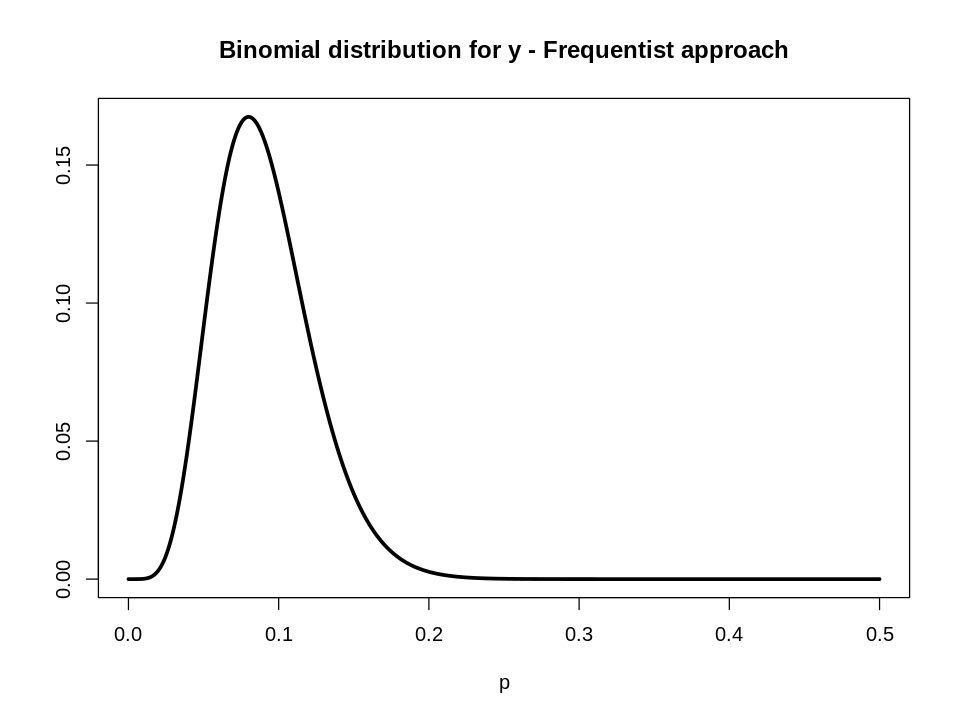

In [3]:
n <-75
y <-6


pf <- y/n #unbiased estimator
cat("Frequentist estimator: ", pf)


x<-seq(0,0.5,0.0001)
#plot
options(repr.plot.width = 8, repr.plot.height = 6) 
plot(x, dbinom(y, n, x), type="l", lwd=3,
     xlab = "p", ylab="", main="Binomial distribution for y - Frequentist approach")



 3. Setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14.  Plot the posterior distribution for y, and mark on the plot the mean value and variance.

 
 Mean:  0.08
 Variance:  0.001
 Std:  0.03

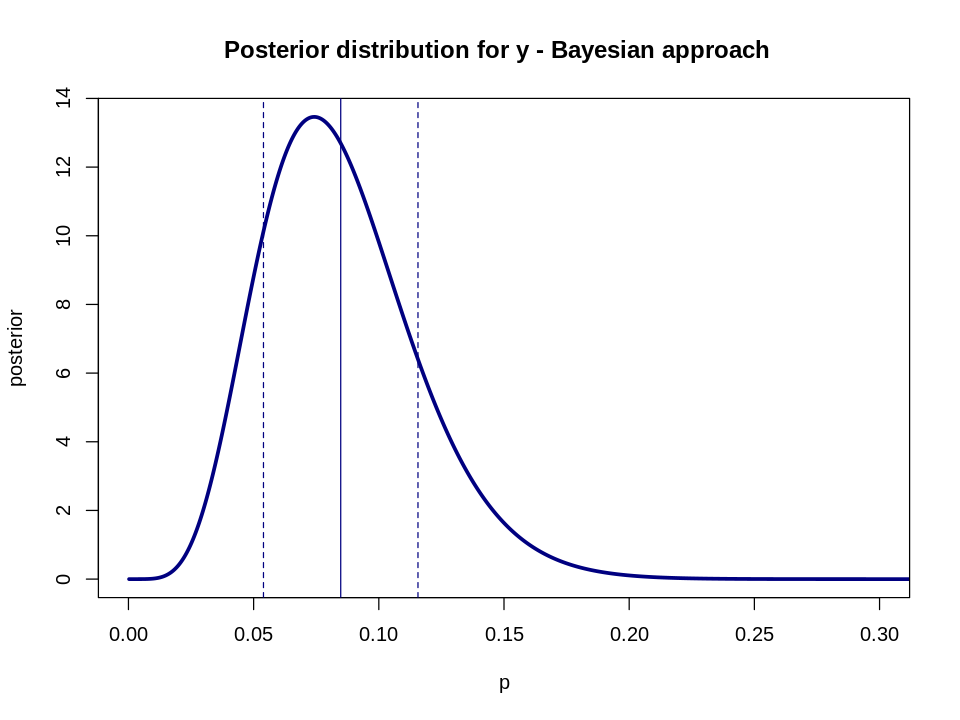

In [12]:
n.sample <- 2000
delta.p <- 1/n.sample
p<-seq(from=1/(2*n.sample),by=1/n.sample,length.out=n.sample)


n <-75
y <-6

m <- 0.15
sigma <- 0.14
alpha.prior <- m * (((m*(1-m))/sigma^2)-1)
beta.prior  <- (1-m)* (((m*(1-m))/sigma^2)-1)

#prior<-function(x){dbeta(x=x,alpha.prior,beta.prior)}
#likelihood <-function(x){dbinom(x=y, size=n, prob=p)}
posterior <-function(x){dbeta(x=x, alpha.prior+y, beta.prior+n-y)}

a <- alpha.prior+y
b <-beta.prior+n-y
mean <- a/(a+b)
var <- (a*b)/((a+b)^2 * (a+b+1))
std <- var^0.5
#most <- p[which.max(posterior(p)]

cat(" \n Mean: ", sprintf("%.2f",mean))
cat("\n Variance: ", sprintf("%.3f",var ))  
cat("\n Std: ", sprintf("%.2f",std))  

#plot
options(repr.plot.width = 8, repr.plot.height = 6) 
plot(p, posterior(p), type="l", lwd=3, col="navy", xlim=c(0,0.3),
     xlab="p", ylab="posterior", main="Posterior distribution for y - Bayesian approach  " )
abline(v=mean, col="navy", lwd=1)
abline(v=mean-std, col="navy", lty=2, lwd=1)
abline(v=mean+std, col="navy", lty=2, lwd=1)




 4. Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.

$$ H_0 : p > 0.15$$
$$H_1 : p \leq 0.15 $$

P(p > 0.15| y=6) = 0.031 


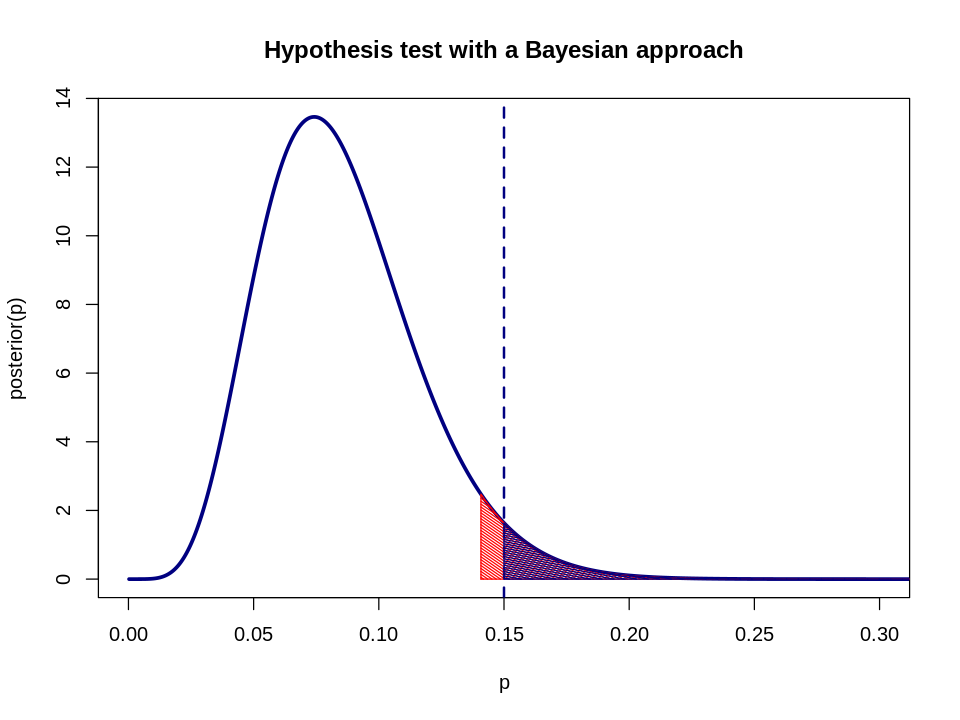

In [13]:

prob <- pbeta(0.15,a,b, lower.tail=FALSE)
cat("P(p > 0.15| y=6) =", sprintf("%.3f",prob), "\n")


                 
plot(p, posterior(p), type="l", lwd=3, col="navy", xlim=c(0,0.3), 
    main="Hypothesis test with a Bayesian approach")
abline(v=0.15, col="navy", lwd=2, lty=2)

#area 5%
low <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 0.95, interval=c(0,1), extendInt = "yes")$root
upper <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 1, interval=c(0,1), extendInt = "yes")$root
x.norm <-c(low, seq(low, upper,0.0001), low)
y.norm <-c(0,posterior( seq(low, upper,0.0001)),0)
polygon(x.norm,y=y.norm, density = 50, angle = -45,col="red")  

                 
low <- 0.15
upper <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 1, interval=c(0,1), extendInt = "yes")$root
x.norm <-c(low, seq(low, upper,0.0001), low)
y.norm <-c(0,posterior( seq(low, upper,0.0001)),0)
polygon(x.norm,y=y.norm, density = 50, angle = -15,col="navy")  

                 
                 


We perform the test at the 5% (alpha) significance level, as we obtain P(p > 0.15| y=6)=3.1%, we have that alpha > 3.1% and so we reject the null hypothesis H0 of the new test being no better than the traditional one. This can also be observed from the plot above: the area in red corresponding to the 5% is larger than the one for p > 0.15. 

 5. Perform the same hypothesis test in the classical frequentist way.

The p-value:  0.0544

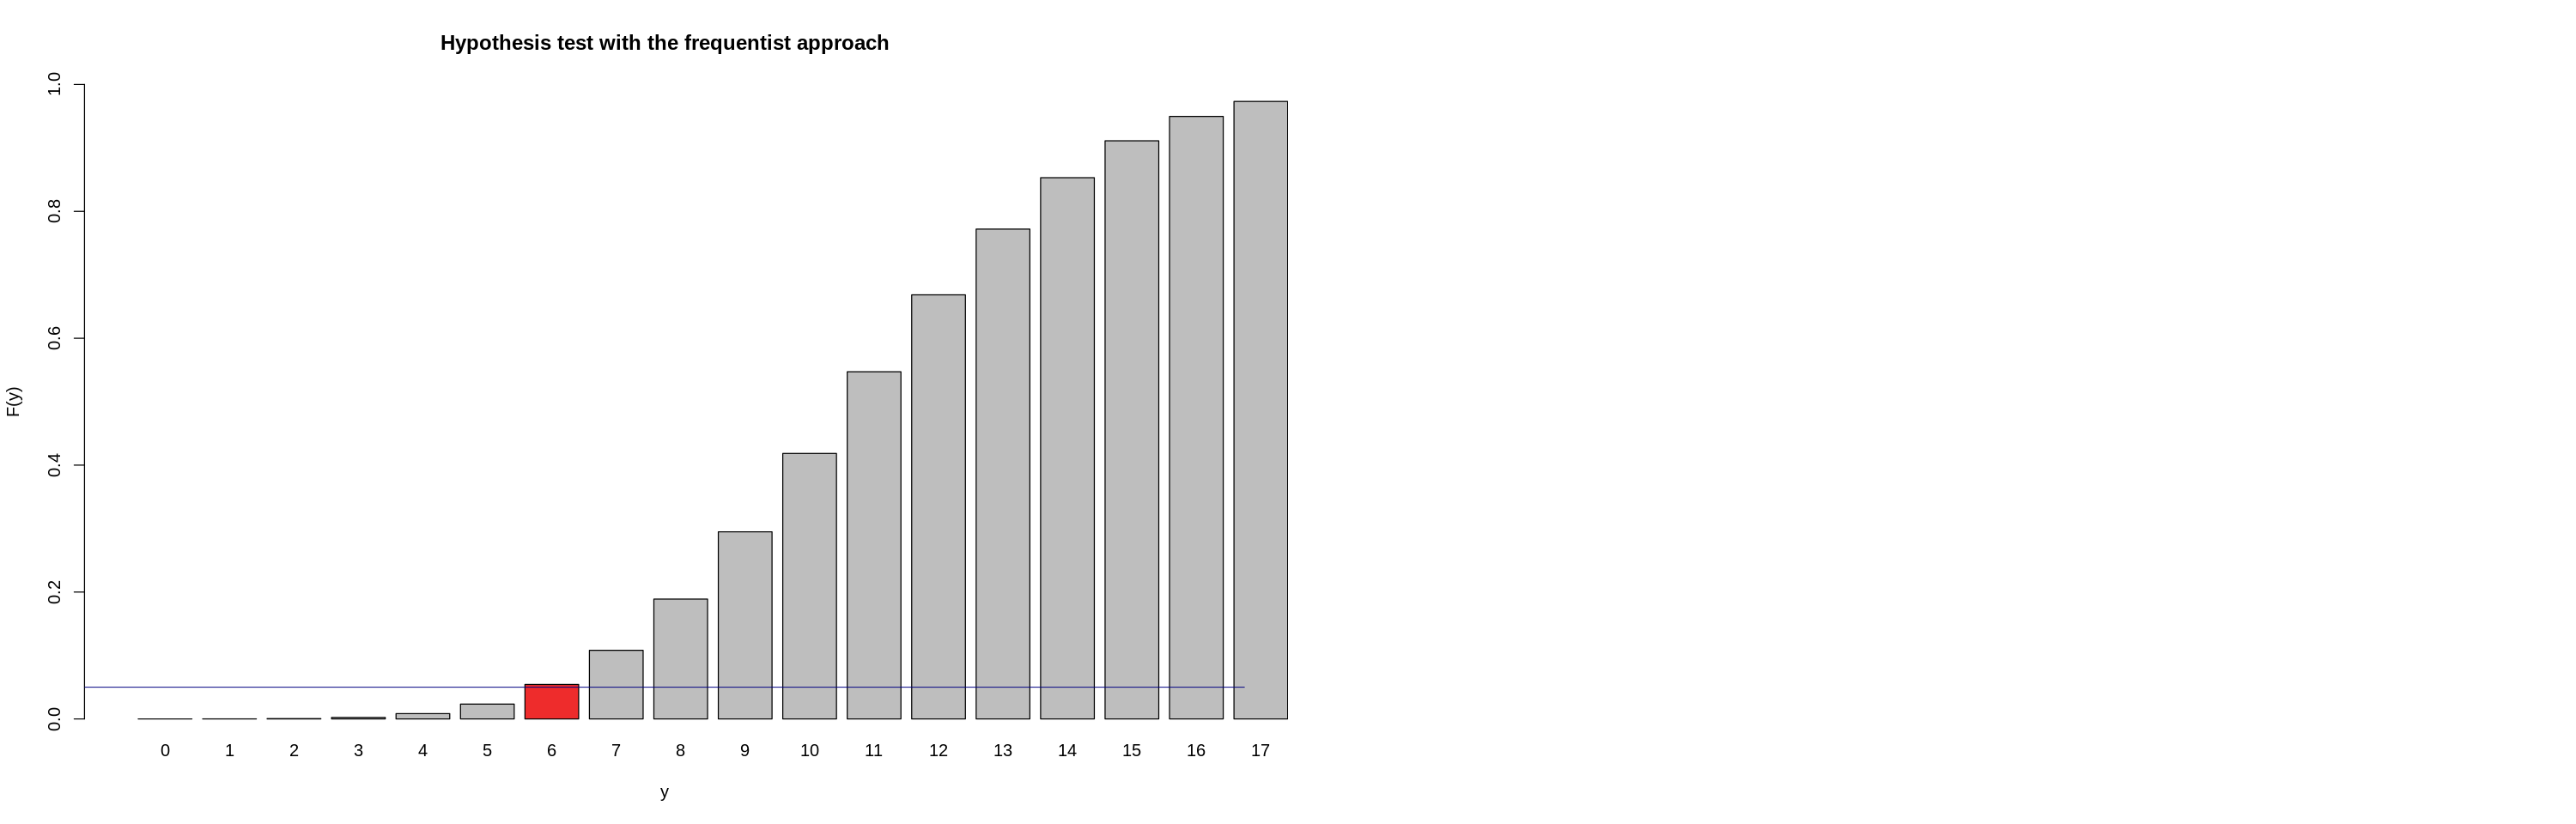

In [14]:
p0 <- 0.15
alpha <- 0.05

n <-75
y<-6

samples <- 0:n
d.null <- dbinom(samples,n,p0)
p.null <- pbinom(samples,n,p0)

p.value <- pbinom(6,n,p0)  

cat("The p-value: ",  sprintf("%.4f",p.value))

par(mfrow=c(1, 2))
options(repr.plot.width = 25, repr.plot.height = 8) 

colors <- c(rep("grey", length(0:5)),rep("firebrick2",1), rep("grey", length(9:30)))

barplot(p.null, names=samples, xlim = c(0,20), ylim=c(0,1), col=colors[1:25],
        xlab="y", ylab="F(y)", main="Hypothesis test with the frequentist approach")
abline(h=alpha, lwd=0.8, col="navy")



In the frequentist way we have: 

$$ p-value = 0.0544 \; \; > \; \; alpha=0.05$$

so we can accept the null nypothesis H0. This could also be observed in the barplot: for y=6 the bar lies above the alpha horizontal line, in the acceptance region (beign the values so close it's difficult to directly observe this).  

## Exercise 2

Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician.  He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population.  In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution

Considering the following to sets of observations taken over a fixed large time interval in two different corps:

|y death soldiers| 0| 1| 2| 3| 4| ≥5|
|---|---|---|---|---|---|---|
|$n_1$ observations|109|65|22|3|1|0|
|$n_2$ observations|144|91|32|11|2|0|

1. Assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time.  Determine the posterior mean, median and variance, and compute the 95% credibility interval.

2. Assuming now a Jeffreys’ prior, g(λ)∝1/√λ, with λ >0 compute  and  plot  the  posterior  distribution  for λ,  the  death  rate  over  the  measurement  time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

For n1 with uniform prior: 
 Mean:  0.615
 Variance:  0.003 
 Median:  0.613 
For n1 with Jeffrey's prior: 
 Mean :  0.613
 Variance:  0.003 
 Median:  0.611 
For n2 with uniform prior: 
 Mean:  0.704
 Variance:  0.003 
 Median:  0.702 
For n2 with Jeffrey's prior: 
 Mean:  0.702
 Variance:  0.003 
 Median:  0.701 
The credibility interval for n1 are:
 With a uniform prior:  0.511 - 0.728
 With a Jeffrey's prior:  0.509 - 0.726 
The credibility interval for n2 are:
 With a uniform prior:  0.609 - 0.805
 With a Jeffrey's prior:  0.607 - 0.803 


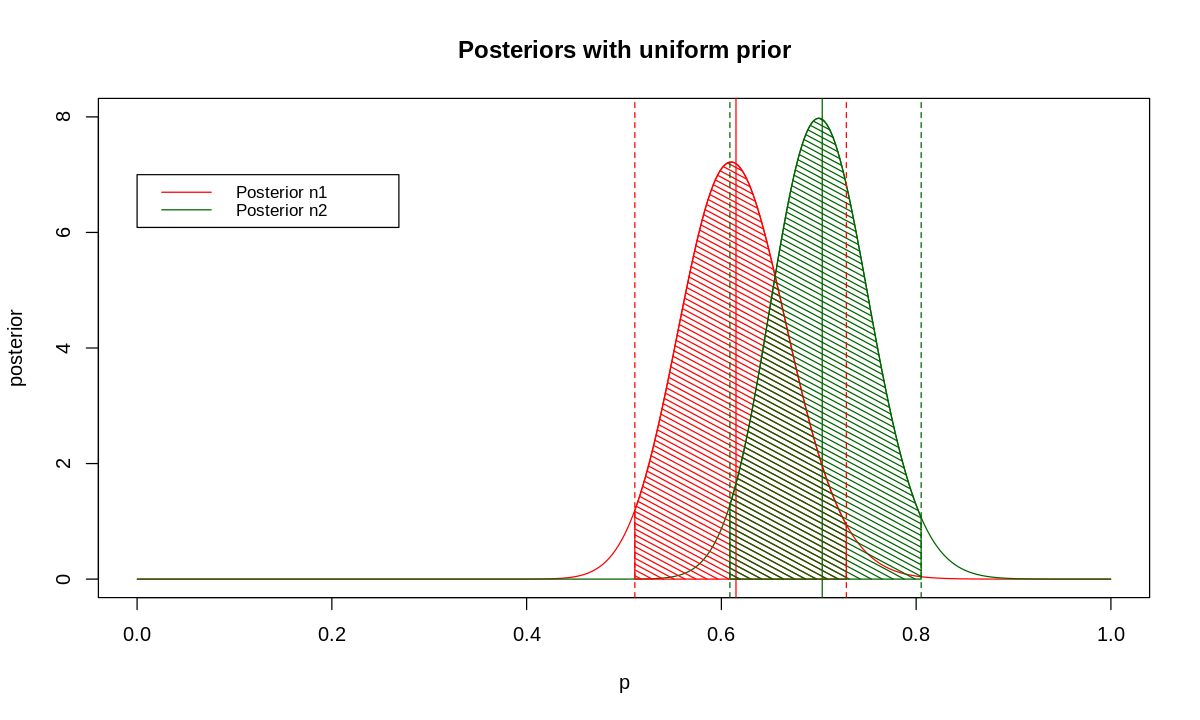

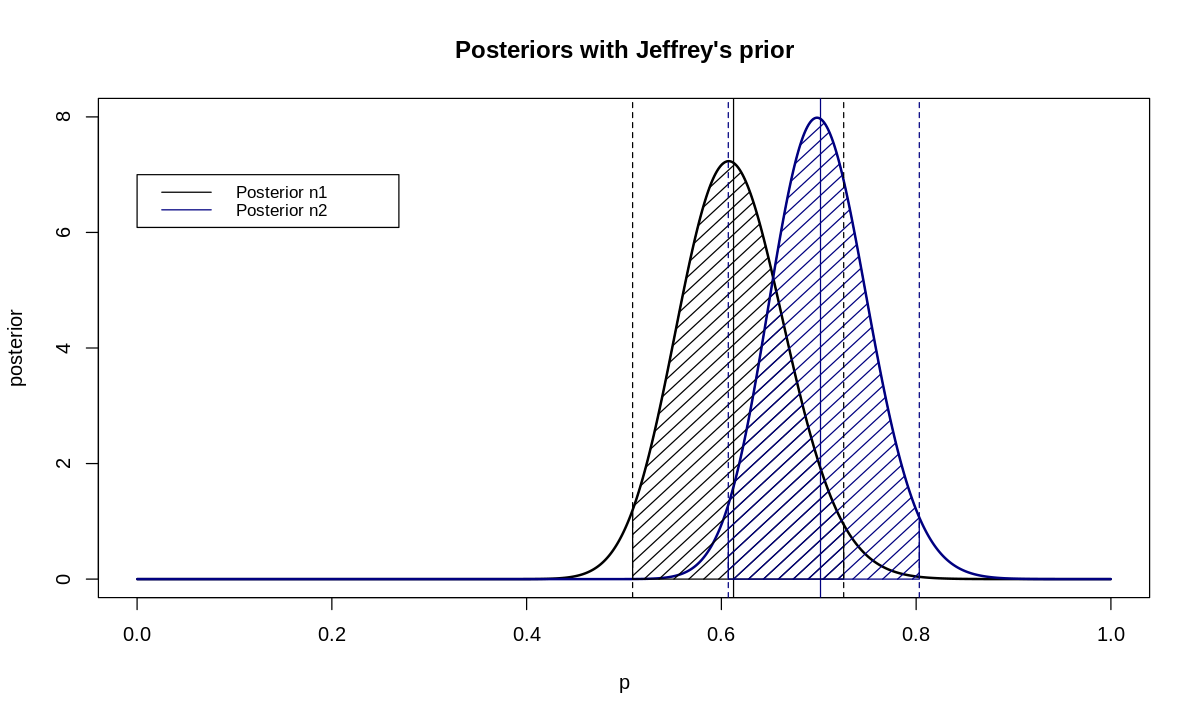

In [15]:
y.death <- c(0,1,2,3,4,5)
n1.obs <- c(109,65,22,3,1,0)
n2.obs <- c(144,91,32,11,2,0)

n.sample<-2000;
delta.x<-1/n.sample
x<-seq(1/(2*n.sample),1, by=1/n.sample)



#N1
#uniform
alpha.n1 <- sum(y.death*n1.obs)+1
lambda.n1 <- sum(n1.obs)
posterior.n1 <-function(x){dgamma(x, shape=alpha.n1, rate=lambda.n1)} 
mean.n1 <-  alpha.n1*(1/lambda.n1)
var.n1 <-   alpha.n1*(1/lambda.n1^2)
median.n1 <- uniroot(function(x) integrate(posterior.n1,lower=0, upper=x)$value - 0.50, interval=c(0,100), extendInt = "yes")$root


#jeffrey 
alpha.jf.n1 <- sum(y.death*n1.obs)+(1/2)
lambda.jf.n1 <- sum(n1.obs)
posterior.jf.n1 <-function(x){dgamma(x, shape=alpha.jf.n1, rate=lambda.jf.n1)} 
mean.jf.n1 <-  alpha.jf.n1*(1/lambda.jf.n1)
var.jf.n1 <-   alpha.jf.n1*(1/lambda.jf.n1^2)
median.jf.n1 <- uniroot(function(x) integrate(posterior.jf.n1,lower=0, upper=x)$value - 0.50, interval=c(0,100), extendInt = "yes")$root

#N2
#uniform prior
alpha.n2 <- sum(y.death*n2.obs)+1
lambda.n2 <- sum(n2.obs)
posterior.n2 <-function(x){dgamma(x, shape=alpha.n2, rate=lambda.n2)} 
mean.n2 <-  alpha.n2*(1/lambda.n2)
var.n2 <-   alpha.n2*(1/lambda.n2^2)
median.n2 <- uniroot(function(x) integrate(posterior.n2,lower=0, upper=x)$value - 0.50, interval=c(0,100), extendInt = "yes")$root

#jeffrey 
alpha.jf.n2 <- sum(y.death*n2.obs)+(1/2)
lambda.jf.n2 <- sum(n2.obs)
posterior.jf.n2 <-function(x){dgamma(x, shape=alpha.jf.n2, rate=lambda.jf.n2)} 
mean.jf.n2 <-  alpha.jf.n2*(1/lambda.jf.n2)
var.jf.n2 <-   alpha.jf.n2*(1/lambda.jf.n2^2)
median.jf.n2 <- uniroot(function(x) integrate(posterior.jf.n2,lower=0, upper=x)$value - 0.50, interval=c(0,100), extendInt = "yes")$root
                       
                       
#Credibility interval 
cred_func <- function(posterior){
x <-seq(0,10,0.001)
low <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 0.025, interval=c(0,100), extendInt = "yes")$root
upper <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 0.975, interval=c(0,100), extendInt = "yes")$root
return(c(low, upper))
}

cred.interval.n1 <- cred_func(posterior.n1)
cred.interval.n2 <- cred_func(posterior.n2)

cred.interval.jf.n1 <- cred_func(posterior.jf.n1)
cred.interval.jf.n2 <- cred_func(posterior.jf.n2)

cat("For n1 with uniform prior:")
cat(" \n Mean: ", sprintf("%.3f",mean.n1))  
cat("\n Variance: ", sprintf("%.3f",var.n1) )  
cat(" \n Median: ", sprintf("%.3f",median.n1), "\n")

cat("For n1 with Jeffrey's prior:")
cat(" \n Mean : ",sprintf("%.3f",mean.jf.n1))  
cat("\n Variance: ", sprintf("%.3f",var.jf.n1) )  
cat(" \n Median: ", sprintf("%.3f",median.jf.n1), "\n")
                               
cat("For n2 with uniform prior:")
cat(" \n Mean: ",sprintf("%.3f",mean.n2))
cat("\n Variance: ", sprintf("%.3f",var.n2) )  
cat(" \n Median: ", sprintf("%.3f",median.n2), "\n")
                 
cat("For n2 with Jeffrey's prior:")
cat(" \n Mean: ",  sprintf("%.3f",mean.jf.n2))  
cat("\n Variance: ", sprintf("%.3f",var.jf.n2) )  
cat(" \n Median: ", sprintf("%.3f",median.jf.n2), "\n")
                 
                 
cat("The credibility interval for n1 are:")
cat("\n With a uniform prior: ",sprintf("%.3f", cred.interval.n1[1]),"-",sprintf("%.3f", cred.interval.n1[2]) )
cat("\n With a Jeffrey's prior: ",sprintf("%.3f", cred.interval.jf.n1[1]),"-",sprintf("%.3f", cred.interval.jf.n1[2]), "\n")

cat("The credibility interval for n2 are:")
cat("\n With a uniform prior: ",sprintf("%.3f", cred.interval.n2[1]),"-",sprintf("%.3f", cred.interval.n2[2]) )
cat("\n With a Jeffrey's prior: ",sprintf("%.3f", cred.interval.jf.n2[1]),"-",sprintf("%.3f", cred.interval.jf.n2[2]), "\n")             
                       
#PLOT
options(repr.plot.width = 10, repr.plot.height = 6) 
#par(mfrow=c(1, 2))
                 
                 
#plot posterior                             
plot(x, posterior.n1(x), type="l", col="red", lwd=1, lty=1,ylim=c(0,8),
     xlab="p", ylab="posterior", main="Posteriors with uniform prior")
lines(x, posterior.n2(x), type="l", col="darkgreen", lwd=1, lty=1)                
legend(x=0, y=7, legend=c("Posterior n1", "Posterior n2"),
       col=c("red", "darkgreen"), lty=1, cex=0.85)
abline(v=mean.n1,lty=1, lwd=1, col="red")
abline(v=mean.n2,lty=1, lwd=1, col="darkgreen")
                 
                 
x.norm <-c(cred.interval.n1[1], seq(cred.interval.n1[1], cred.interval.n1[2],0.0001), cred.interval.n1[2])
y.norm <-c(0,posterior.n1( seq(cred.interval.n1[1], cred.interval.n1[2],0.0001)),0)
polygon(x.norm,y=y.norm, density = 25, angle = -45,col="red")  
                               
x.norm <-c(cred.interval.n2[1], seq(cred.interval.n2[1], cred.interval.n2[2],0.0001), cred.interval.n2[2])
y.norm <-c(0,posterior.n2( seq(cred.interval.n2[1], cred.interval.n2[2],0.0001)),0)
polygon(x.norm,y=y.norm, density = 25, angle = -45,col="darkgreen")  
                       
abline(v=cred.interval.n1[1],lty=2, lwd=1, col="red")
abline(v=cred.interval.n1[2],lty=2, lwd=1, col="red")             
abline(v=cred.interval.n2[1],lty=2, lwd=1, col="darkgreen")
abline(v=cred.interval.n2[2],lty=2, lwd=1, col="darkgreen")


#plot jeffrey posterior   
plot(x, posterior.jf.n1(x), type="l", col="black", lwd=2, lty=1, ylim=c(0,8),
      xlab="p", ylab="posterior", main="Posteriors with Jeffrey's prior")
lines(x, posterior.jf.n2(x), type="l", col="navy", lwd=2, lty=1)
legend(x=0, y=7, legend=c("Posterior n1", "Posterior n2"),
       col=c("black", "navy"), lty=1, cex=0.85)
abline(v=mean.jf.n1,lty=1, lwd=1, col="black")
abline(v=mean.jf.n2,lty=1, lwd=1, col="navy")

                                  
x.norm <-c(cred.interval.jf.n1[1], seq(cred.interval.jf.n1[1], cred.interval.jf.n1[2],0.0001), cred.interval.jf.n1[2])
y.norm <-c(0,posterior.jf.n1( seq(cred.interval.jf.n1[1], cred.interval.jf.n1[2],0.0001)),0)
polygon(x.norm,y=y.norm, density = 15, angle = +60 ,col="black")  
                              
x.norm <-c(cred.interval.jf.n2[1], seq(cred.interval.jf.n2[1], cred.interval.jf.n2[2],0.0001), cred.interval.jf.n2[2])
y.norm <-c(0,posterior.jf.n2( seq(cred.interval.jf.n2[1], cred.interval.jf.n2[2],0.0001)),0)
polygon(x.norm,y=y.norm, density = 15, angle = +60 ,col="navy")  

abline(v=cred.interval.jf.n2[1],lty=2, lwd=1, col="navy")
abline(v=cred.interval.jf.n2[2],lty=2, lwd=1, col="navy")              
abline(v=cred.interval.jf.n1[1],lty=2, lwd=1, col="black")
abline(v=cred.interval.jf.n1[2],lty=2, lwd=1, col="black")

              

## Exercise 3 

A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n= 116 samples were taken from streams having a high environmental impact on pandas.  Out of these,y= 11 had a high bacter X level.

Indicating with p the probability that a sample of water taken from the stream has a high bacter X level, respond to the following points.




In [16]:
cred_func <- function(posterior){
x <-seq(0,1,0.001)
low <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 0.025, interval=c(0,1), extendInt = "yes")$root
upper <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 0.975, interval=c(0,1), extendInt = "yes")$root
return(c(low, upper))
}

## First measurement 

In [17]:
n <- 116
y <- 11

1. Find the frequentist estimator for p

In [18]:
#frequentist approach

estimator <- y/n
cat("The frequentist estimator for p is equal to ", sprintf("%.2f",estimator ))

The frequentist estimator for p is equal to  0.09

2. Using a Beta(1,10) prior for p, calculate and posterior distribution P(p∣y)
3. Find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

4. Test the hypotesis <br> 
    $$H_0:p= 0.1 \;\;  \text{versus} \; \; H_1:p \neq 0.1 $$
    at 5% level of significance with both the frequentist and bayesian approach

###### Bayesian approach

The Bayesian estimator for p is:  0.09 
Variance:  0.001 
The credibility interval is:0.05 - 0.15

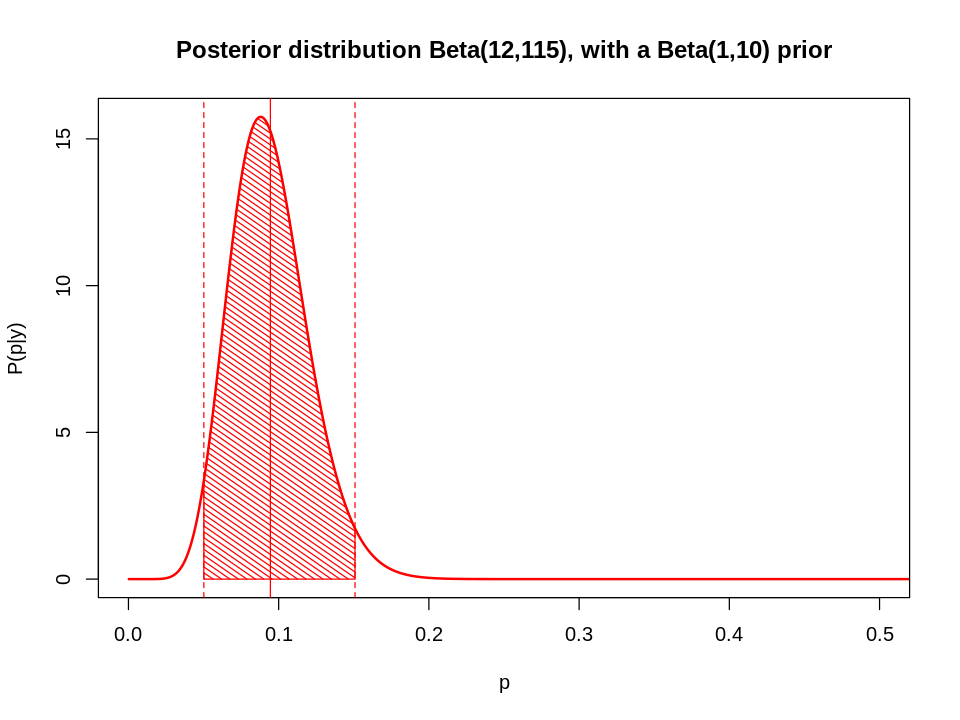

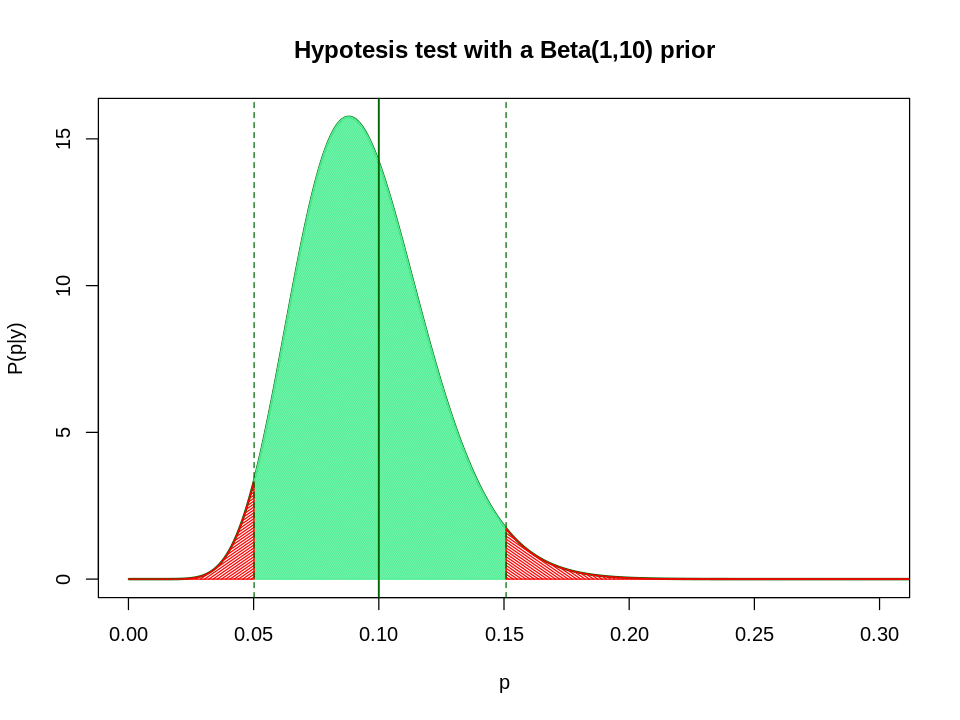

In [19]:
n.sample<-2000;
delta.x<-1/n.sample
p<-seq(1/(2*n.sample),1, by=1/n.sample)

prior <- function(x){dbeta(x, 1, 10)}
posterior <- function(x){dbeta(x, 1+y, 10+n-y)}

a <- 1+y
b <-10+n-y
mean <- a/(a+b)  #OR whichmax
var <- (a*b)/((a+b)^2 * (a+b+1))


cat("The Bayesian estimator for p is: ", sprintf("%.2f",mean), "\n")
cat("Variance: ", sprintf("%.3f",var), "\n")


cred.int <- cred_func(posterior)

cat("The credibility interval is:")
cat(sprintf("%.2f", cred.int[1]),"-",sprintf("%.2f", cred.int[2]) )

                        
#PLOT
options(repr.plot.width = 8, repr.plot.height = 6) 

plot(p, posterior(p), type="l", lwd=2, col="red", xlab="p",ylab="P(p|y)",xlim=c(0,0.5),
     main=paste("Posterior distribution Beta(12,115), with a Beta(1,10) prior"))
abline(v=mean,lty=1, lwd=1, col="red")
                      
x.norm <-c(cred.int[1], seq(cred.int[1], cred.int[2],0.0001), cred.int[2])
y.norm <-c(0,posterior( seq(cred.int[1], cred.int[2],0.0001)),0)
polygon(x.norm,y=y.norm, density = 25, angle = -45,col="red")  
                 
abline(v=cred.int[1],lty=2, lwd=1, col="red")
abline(v=cred.int[2],lty=2, lwd=1, col="red")


plot(p, posterior(p), type="l", lwd=2, col="darkgreen", xlab="p",ylab="P(p|y)",xlim=c(0,0.3),
main=paste("Hypotesis test with a Beta(1,10) prior"))
                      
                 
x.norm <-c(cred.int[1], seq(cred.int[1], cred.int[2],0.0001), cred.int[2])
y.norm <-c(0,posterior( seq(cred.int[1], cred.int[2],0.0001)),0)
polygon(x.norm,y=y.norm, density = 100, angle = -45,col="seagreen2")  

#tail dx
low <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 0.975, interval=c(0,1), extendInt = "yes")$root
upper <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 1, interval=c(0,1), extendInt = "yes")$root
x.norm <-c(low, seq(low, upper,0.0001), low)
y.norm <-c(0,posterior( seq(low, upper,0.0001)),0)
polygon(x.norm,y=y.norm, density = 50, angle = -45,col="red")

#tail sx
low <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 0, interval=c(0,1), extendInt = "yes")$root
upper <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 0.025, interval=c(0,1), extendInt = "yes")$root
x.norm <-c(low, seq(low, upper,0.0001), upper)
y.norm <-c(0,posterior(seq(low, upper,0.0001)),0)
polygon(x.norm,y=y.norm, density = 50, angle = 45,col="red")
 
 
                 
abline(v=cred.int[1],lty=2, lwd=1, col="darkgreen")
abline(v=cred.int[2],lty=2, lwd=1, col="darkgreen")
abline(v=0.1,lty=1, lwd=1.5, col="darkgreen")


As regards the hypothesis test we have to check if $p_0$ lies inside the 95% credibility interval, as we have a 5% significance level. The credibility interval is $0.05-0.15$ so $p_0=0.1$ is inside and therefore we do not reject the null hypothesis 

 ###### Frequentist approach

In [20]:
p0 <- 0.1
alpha <- 0.05 #conventional value

Level of significance (as close to 5% as possible) chosen:  4.254 %

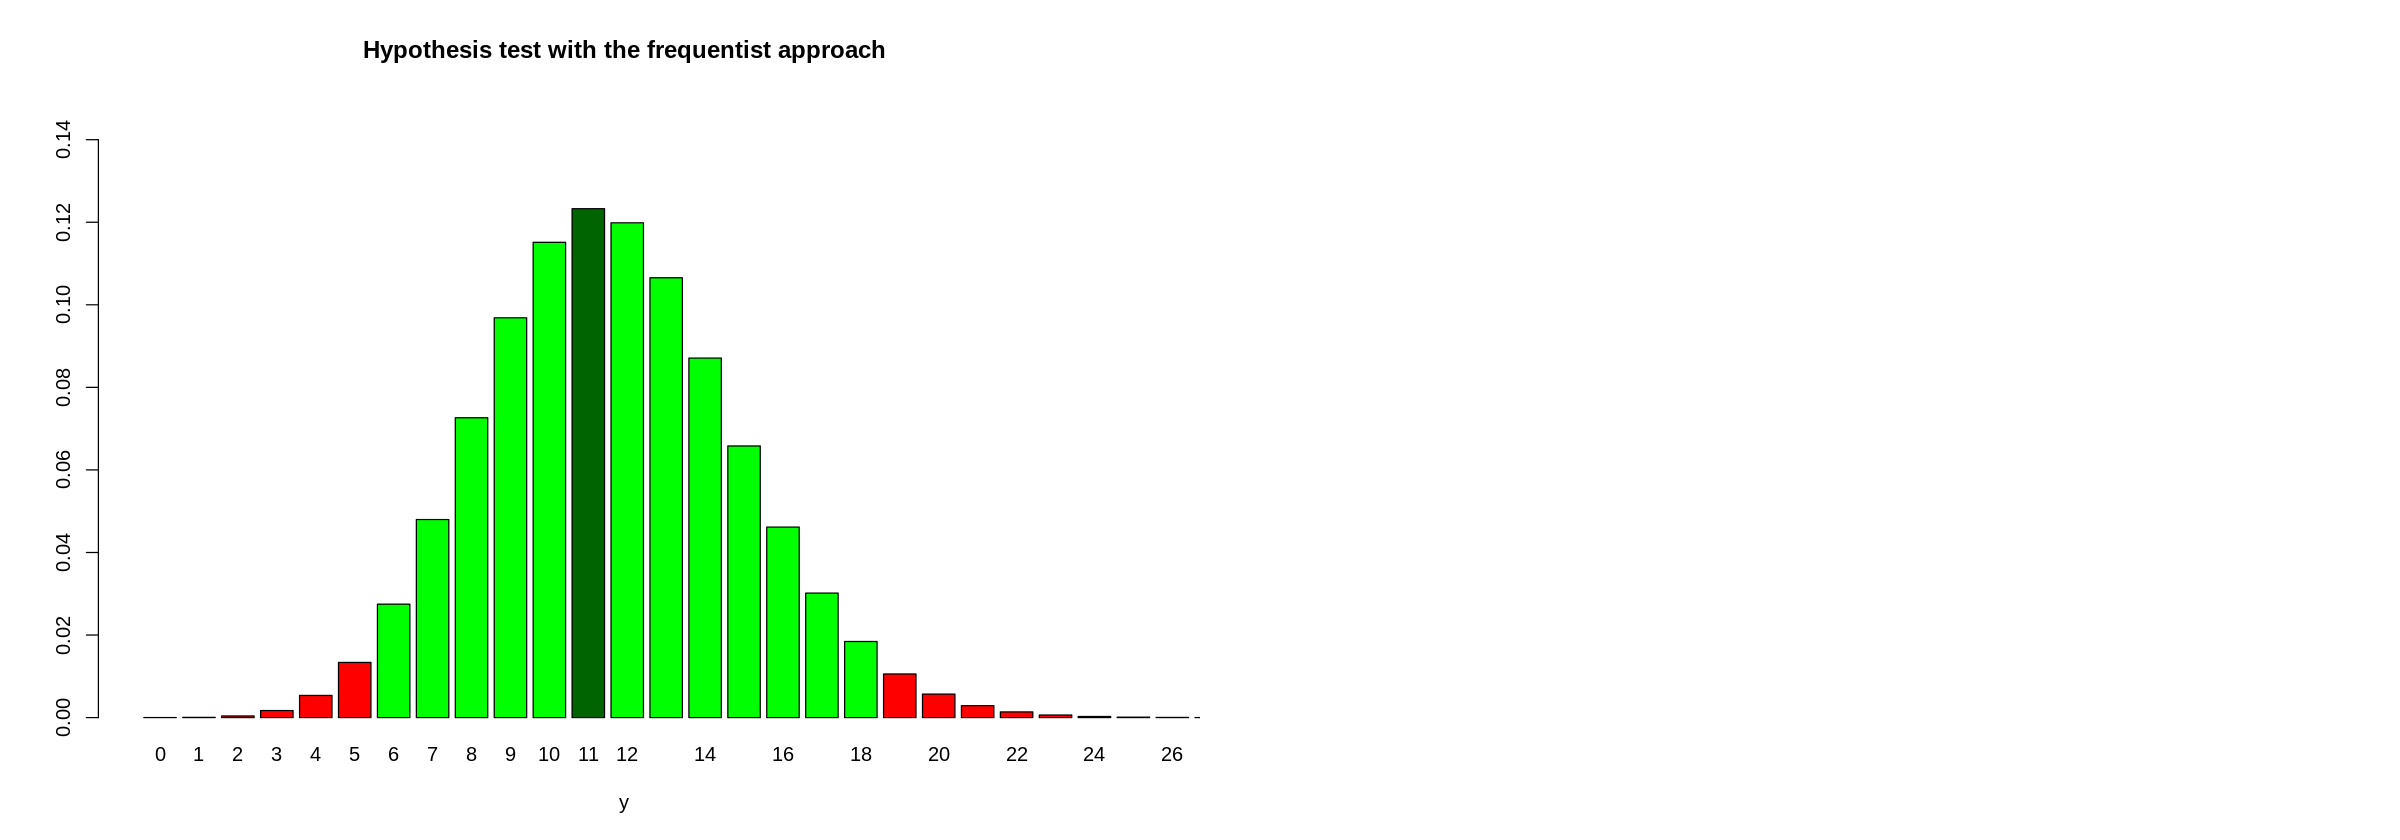

In [27]:
#frequentist approach 
n <- 116
y <- 11

samples <- 0:n
d.null <- dbinom(samples,n,p0)
p.null <- pbinom(samples,n,p0)


level.alpha <- pbinom(5,n,p0) + pbinom(18,n,p0, lower.tail=FALSE)  #Closer to 5% 
cat("Level of significance (as close to 5% as possible) chosen: ", sprintf("%.3f",level.alpha*100), "%")


par(mfrow=c(1, 2))
options(repr.plot.width = 20, repr.plot.height = 7) 

colors <- c(rep("red", length(0:5)),rep("green",length(6:10)),  rep("darkgreen", length(1)), 
            rep("green", length(12:18)),rep("red", length(18:30)))


barplot(d.null, names=samples, xlim = c(0,30), ylim=c(0,0.15),col=colors[1:30],
        xlab="y", ylab="", main="Hypothesis test with the frequentist approach")



Performing the test with a level of significance equal to 4.3%, we do not reject the null hypothesis H0 as y=11 lies in the acceptance zone (green).

## Second measurement 

A new measurement, performed one month later on n= 165 water samples, gives y= 9 high bacter X level

In [22]:
n <- 165
y <- 9

1. Find the frequentist estimator for p

In [23]:
#frequentist approach

estimator <- y/n
cat("The frequentist estimator for p is equal to ", sprintf("%.3f",estimator ))

The frequentist estimator for p is equal to  0.055

2.Find a bayesian estimator for p, assuming both a Beta(1,10) prior for p, and assuming the posterior probability of the older measurement as the prior for the new one.

3. Find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval
4. Test the hypotesis <br> 
    $$H_0:p= 0.1 \;\;  \text{versus} \; \; H_1:p \neq 0.1 $$
    at 5% level of significance with both the frequentist and bayesian approach

 ###### Bayesian approach

Results with Beta(1,10) prior 

 The Bayesian estimator for p is:  0.057
 Variance:  0.0003
 The credibility interval is:  0.028 - 0.095 
 
Results with the posterior of old measuments Beta(12,115) as a new prior 

The Bayesian estimator for p is:  0.072
Variance:  0.0002
The credibility interval is: 0.045 - 0.104

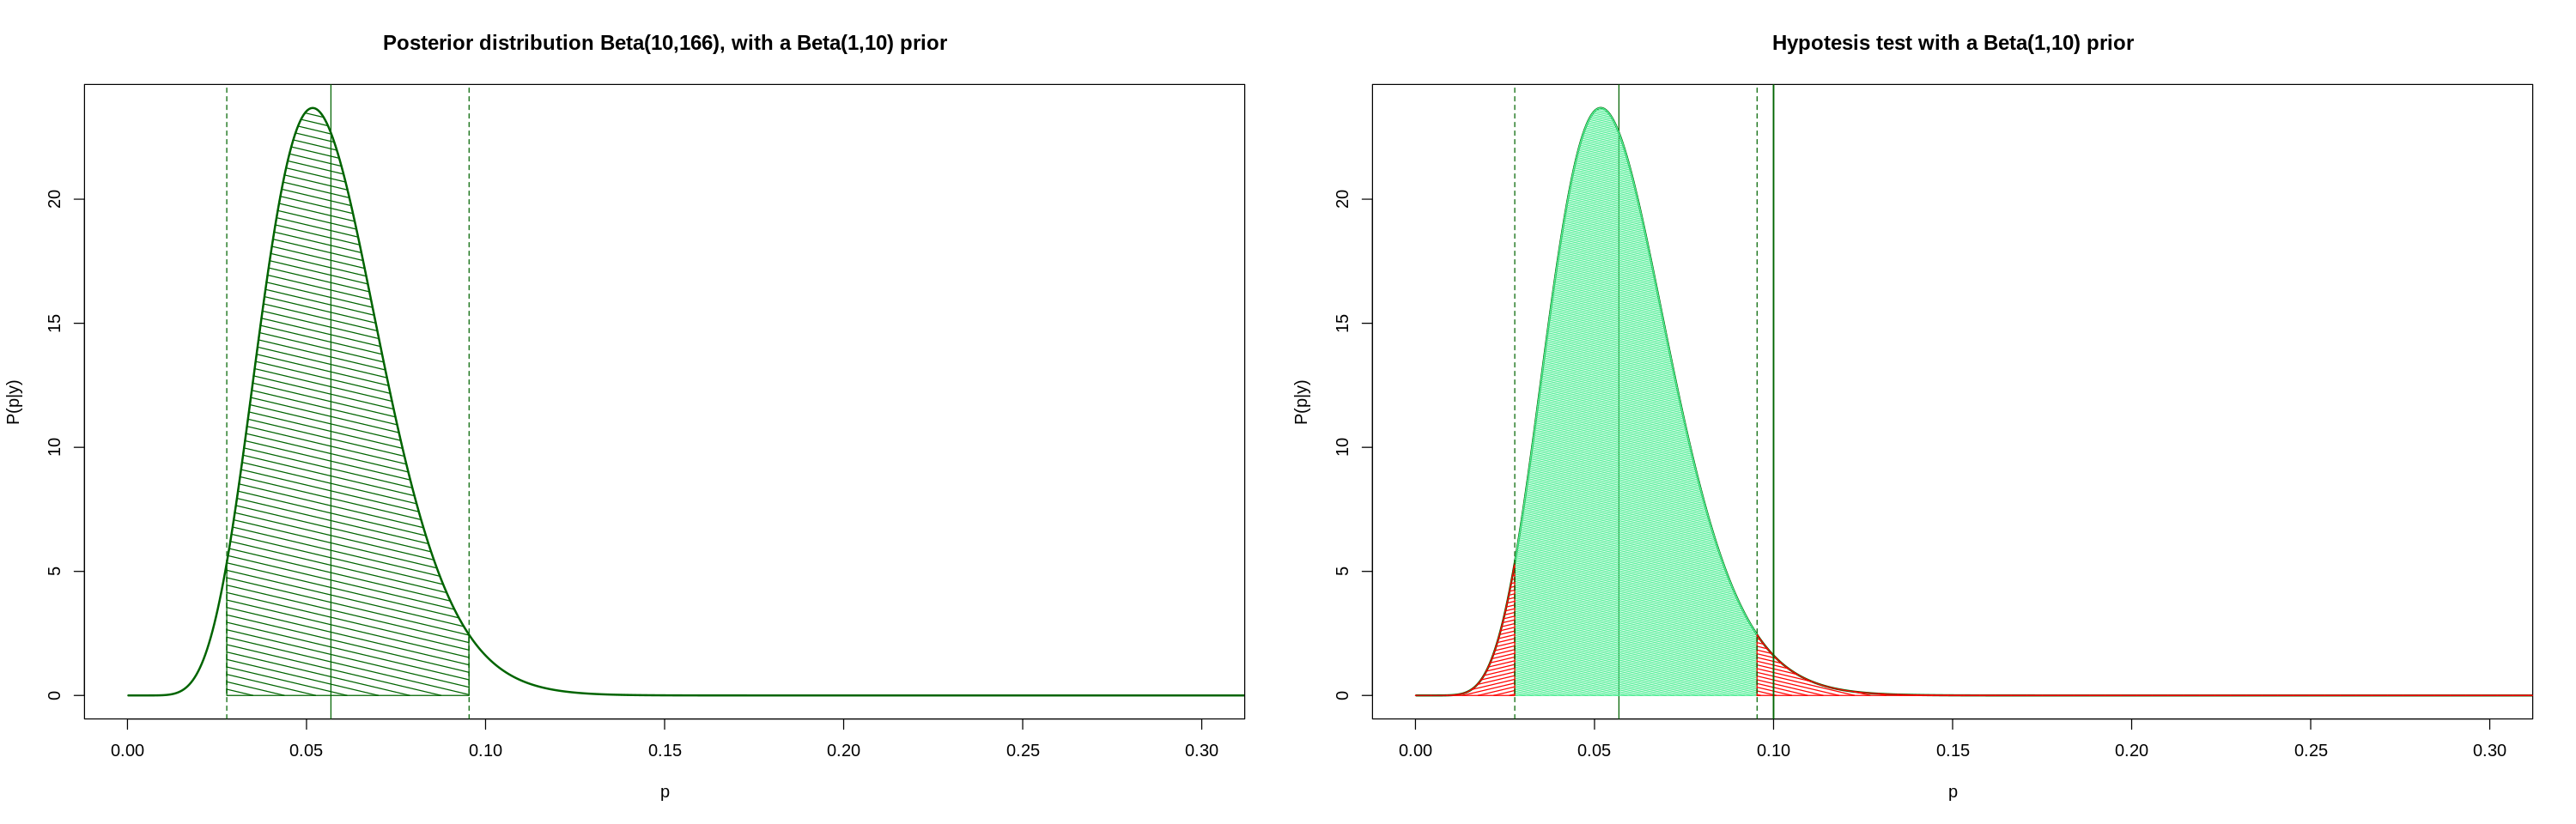

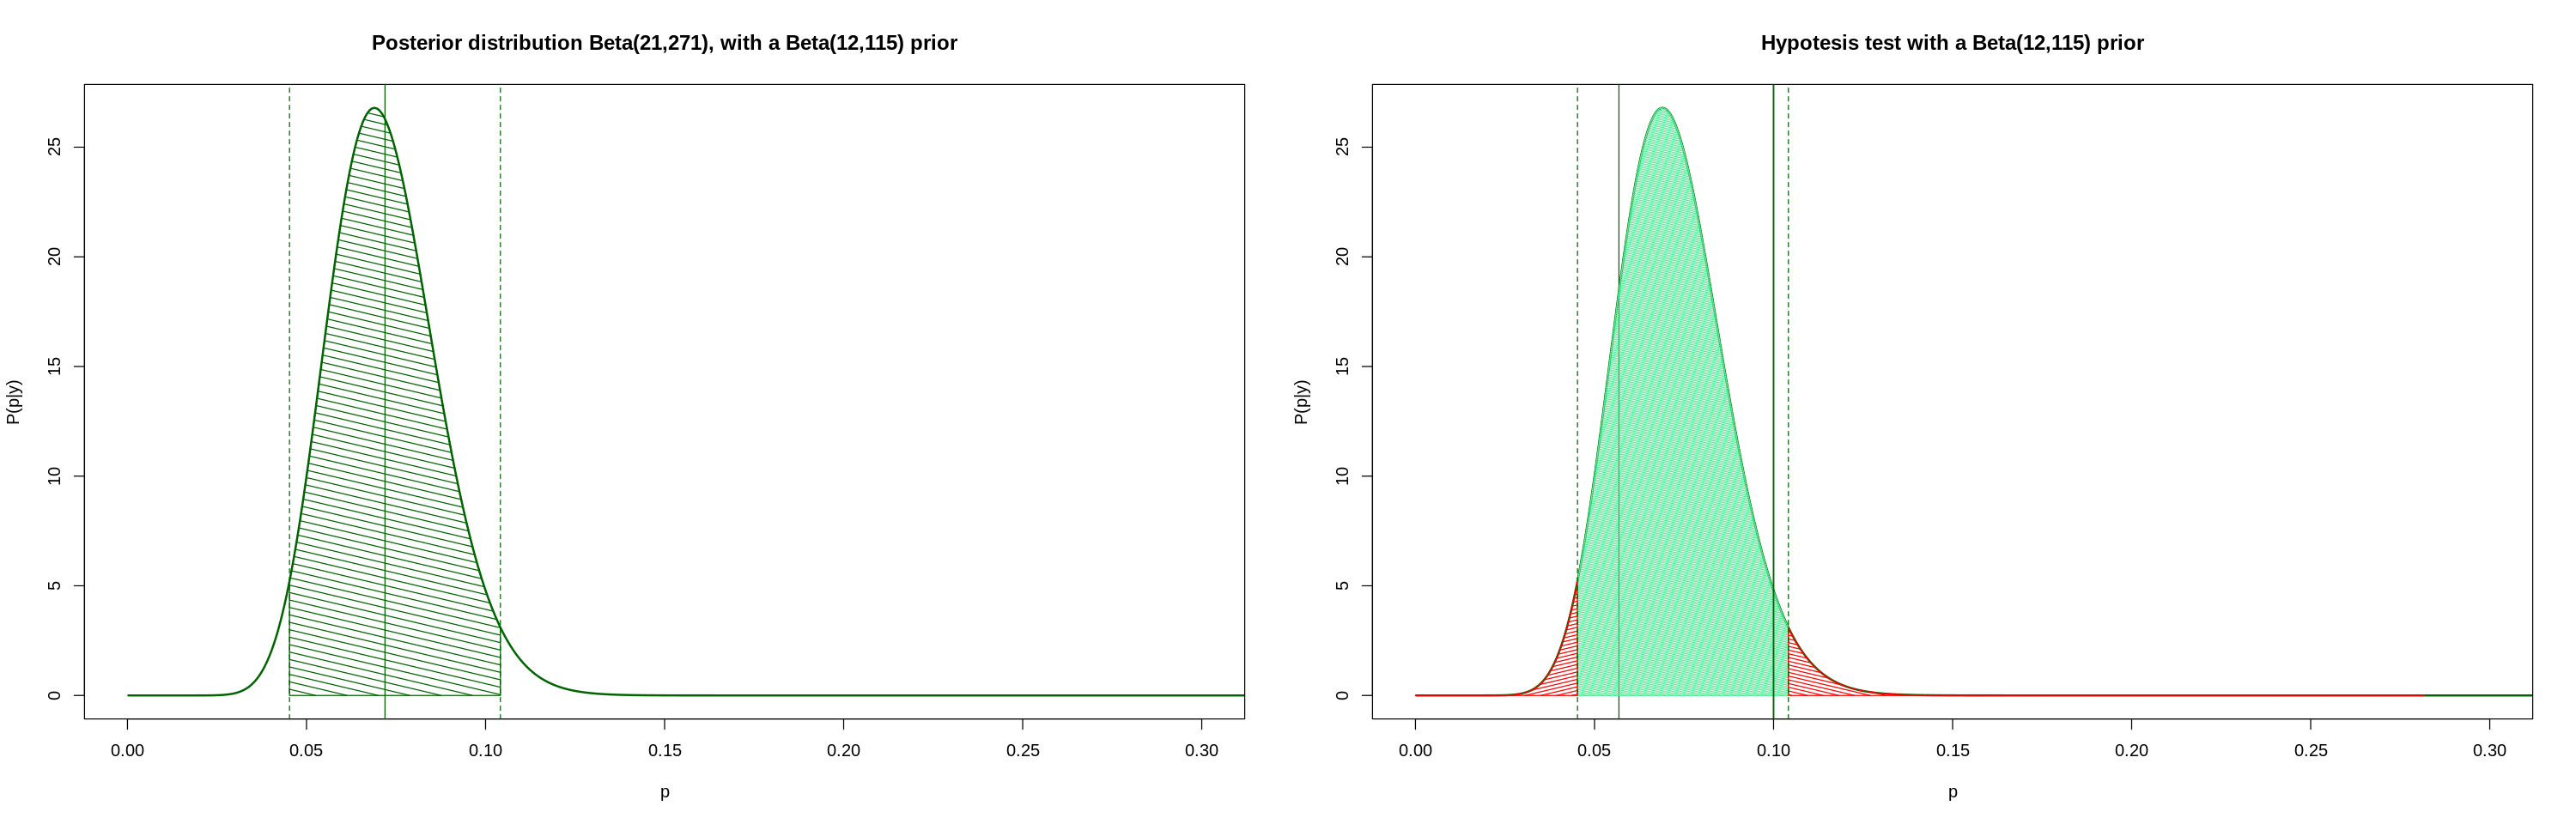

In [24]:
n.sample<-2000;
delta.x<-1/n.sample
p<-seq(1/(2*n.sample),1, by=1/n.sample)


# -------------------------------------------------BETA PRIOR BETA(1,10)

prior <- function(x){dbeta(x, 1, 10)}
posterior <- function(x){dbeta(x, 1+y, 10+n-y)}

a <- 1+y
b <-10+n-y
mean <- a/(a+b)  
var <- (a*b)/((a+b)^2 * (a+b+1))

cred.int <- cred_func(posterior)

#-------------------------------------------------POSTERIOR OF OLD AS NEW PRIOR
posterior.np <- function(x){dbeta(x, 12+y, 115+n-y)}

a2 <- 12+y
b2 <-115+n-y
mean2 <- a2/(a2+b2)  
var2 <- (a2*b2)/((a2+b2)^2 * (a2+b2+1))

cred.int.np <- cred_func(posterior.np)
#-------------------------------------------------------------------------

cat("Results with Beta(1,10) prior \n")
cat("\n The Bayesian estimator for p is: ", sprintf("%.3f",mean))
cat("\n Variance: ", sprintf("%.4f",var))
cat("\n The credibility interval is: ", sprintf("%.3f", cred.int[1]),"-",sprintf("%.3f", cred.int[2]), "\n \n" )

cat("Results with the posterior of old measuments Beta(12,115) as a new prior \n")
cat("\nThe Bayesian estimator for p is: ", sprintf("%.3f",mean2))
cat("\nVariance: ", sprintf("%.4f",var2))    
cat("\nThe credibility interval is: ")
cat(sprintf("%.3f", cred.int.np[1]),"-",sprintf("%.3f", cred.int.np[2]) )
#---------------------------------------------------------------------------
                        
#PLOT
    
    
options(repr.plot.width = 25, repr.plot.height = 8) 
par(mfrow=c(1, 2))

plot(p, posterior(p), type="l", lwd=2, col="darkgreen", xlab="p",ylab="P(p|y)",xlim=c(0,0.3),
     main=paste("Posterior distribution Beta(10,166), with a Beta(1,10) prior"))
abline(v=mean,lty=1, lwd=1, col="darkgreen")
                      
x.norm <-c(cred.int[1], seq(cred.int[1], cred.int[2],0.0001), cred.int[2])
y.norm <-c(0,posterior( seq(cred.int[1], cred.int[2],0.0001)),0)
polygon(x.norm,y=y.norm, density = 25, angle = -45,col="darkgreen")  
                 
abline(v=cred.int[1],lty=2, lwd=1, col="darkgreen")
abline(v=cred.int[2],lty=2, lwd=1, col="darkgreen")


#test
plot(p, posterior(p), type="l", lwd=2, col="darkgreen", xlab="p",ylab="P(p|y)",xlim=c(0,0.3),
main=paste("Hypotesis test with a Beta(1,10) prior"))
abline(v=mean,lty=1, lwd=1, col="darkgreen")
                      
                 
x.norm <-c(cred.int[1], seq(cred.int[1], cred.int[2],0.0001), cred.int[2])
y.norm <-c(0,posterior( seq(cred.int[1], cred.int[2],0.0001)),0)
polygon(x.norm,y=y.norm, density = 100, angle = -45,col="seagreen2")  

#tail dx
low <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 0.975, interval=c(0,1), extendInt = "yes")$root
upper <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 1, interval=c(0,1), extendInt = "yes")$root
x.norm <-c(low, seq(low, upper,0.0001), low)
y.norm <-c(0,posterior( seq(low, upper,0.0001)),0)
polygon(x.norm,y=y.norm, density = 50, angle = -45,col="red")

#tail sx
low <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 0, interval=c(0,1), extendInt = "yes")$root
upper <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 0.025, interval=c(0,1), extendInt = "yes")$root
x.norm <-c(low, seq(low, upper,0.0001), upper)
y.norm <-c(0,posterior(seq(low, upper,0.0001)),0)
polygon(x.norm,y=y.norm, density = 50, angle = 45,col="red")
 
 
                 
abline(v=cred.int[1],lty=2, lwd=1, col="darkgreen")
abline(v=cred.int[2],lty=2, lwd=1, col="darkgreen")
abline(v=0.1,lty=1, lwd=1.5, col="darkgreen")
                 
                 
#------------------------------------------------------------------------                        

plot(p, posterior.np(p), type="l", lwd=2, col="darkgreen", xlab="p",ylab="P(p|y)",xlim=c(0,0.3),
     main=paste("Posterior distribution Beta(21,271), with a Beta(12,115) prior"))
abline(v=mean2,lty=1, lwd=1, col="darkgreen")
                      
x.norm <-c(cred.int.np[1], seq(cred.int.np[1], cred.int.np[2],0.0001), cred.int.np[2])
y.norm <-c(0,posterior.np( seq(cred.int.np[1], cred.int.np[2],0.0001)),0)
polygon(x.norm,y=y.norm, density = 25, angle = -45,col="darkgreen")  
                 
abline(v=cred.int.np[1],lty=2, lwd=1, col="darkgreen")
abline(v=cred.int.np[2],lty=2, lwd=1, col="darkgreen")


#test
plot(p, posterior.np(p), type="l", lwd=2, col="darkgreen", xlab="p",ylab="P(p|y)",xlim=c(0,0.3),
main=paste("Hypotesis test with a Beta(12,115) prior"))
abline(v=mean,lty=1, lwd=1, col="darkgreen")
                      
                 
x.norm <-c(cred.int.np[1], seq(cred.int.np[1], cred.int.np[2],0.0001), cred.int.np[2])
y.norm <-c(0,posterior.np( seq(cred.int.np[1], cred.int.np[2],0.0001)),0)
polygon(x.norm,y=y.norm, density = 100, angle = -45,col="seagreen2")  

#tail dx
low <- uniroot(function(x) integrate(posterior.np,lower=0, upper=x)$value - 0.975, interval=c(0,1), extendInt = "yes")$root
upper <- uniroot(function(x) integrate(posterior.np,lower=0, upper=x)$value - 1, interval=c(0,1), extendInt = "yes")$root
x.norm <-c(low, seq(low, upper,0.0001), low)
y.norm <-c(0,posterior.np( seq(low, upper,0.0001)),0)
polygon(x.norm,y=y.norm, density = 50, angle = -45,col="red")

#tail sx
low <- uniroot(function(x) integrate(posterior.np,lower=0, upper=x)$value - 0, interval=c(0,1), extendInt = "yes")$root
upper <- uniroot(function(x) integrate(posterior.np,lower=0, upper=x)$value - 0.025, interval=c(0,1), extendInt = "yes")$root
x.norm <-c(low, seq(low, upper,0.0001), upper)
y.norm <-c(0,posterior.np(seq(low, upper,0.0001)),0)
polygon(x.norm,y=y.norm, density = 50, angle = 45,col="red")
 
 
abline(v=cred.int.np[1],lty=2, lwd=1, col="darkgreen")
abline(v=cred.int.np[2],lty=2, lwd=1, col="darkgreen")
abline(v=0.1,lty=1, lwd=1.5, col="darkgreen")


As regards the hypothesis test:
- In the first case with a Beta(1,10) prior the credibility interval is 0.028-0.095 while $p_0=0.1$, so as we can see from the plot $p_0$ is not inside the acceptance region and therefore we reject the null hypothesis $H_0$
-In the second case with a Beta(12,115) prior the credibility interval is 0.045 - 0.104 and as shown in the second plot, $p_0$ lies inside so we do not reject the null hypothesis

 ###### Frequentist approach

Level of significance (as close to 5% as possible) chosen:  5.11 %

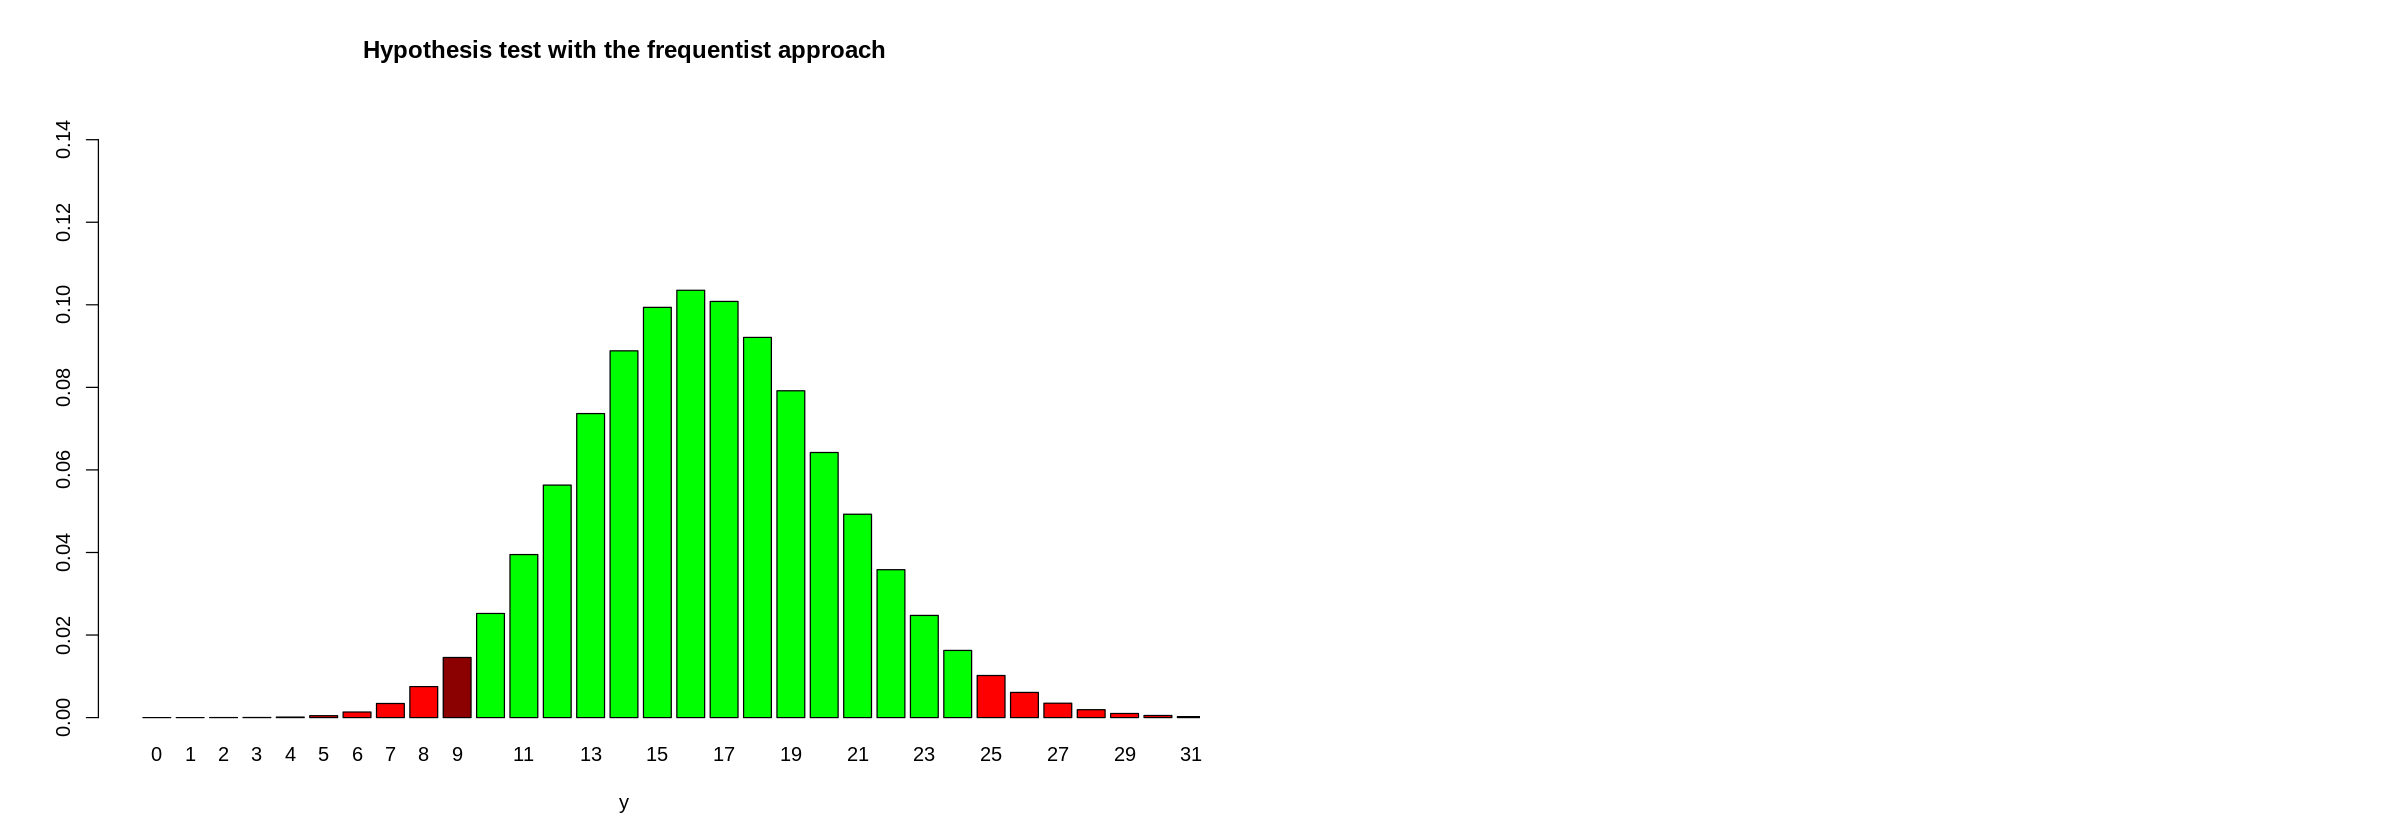

In [32]:
#frequentist test

n <- 165
y <- 9
p0<-0.1

samples <- 0:n
d.null <- dbinom(samples,n,p0)
p.null <- pbinom(samples,n,p0)


alpha.level <- pbinom(9,n,p0) + pbinom(24,n,p0, lower.tail=FALSE) 
cat("Level of significance (as close to 5% as possible) chosen: ", sprintf("%.2f",alpha.level*100), "%")

par(mfrow=c(1, 2))
options(repr.plot.width = 20, repr.plot.height = 7) 

colors <- c(rep("red", length(0:8)),rep("darkred",length(9)),
            rep("green",length(10:24)), rep("red", length(25:30)))

barplot(d.null, names=samples, xlim = c(0,35), ylim=c(0,0.15), col=colors[1:30],
        xlab="y", ylab="", main="Hypothesis test with the frequentist approach")



In this case, performing the test with a significance level of 5.11%, we reject the null hypothesis H0, as we can see from the plot the bar y=9 lies in the rejection zone (red).